In [117]:
import numpy as np
import pandas as pd

In [118]:
df = pd.read_csv('spam.csv', encoding='latin1')


In [119]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
964,ham,Are you this much buzy,NaN,NaN,NaN
74,ham,U can call me now...,NaN,NaN,NaN
5477,ham,What Today-sunday..sunday is holiday..so no wo...,NaN,NaN,NaN
3213,ham,"Babe, have you got enough money to pick up bre...",NaN,NaN,NaN
1170,ham,"Yeah, we can probably swing by once my roommat...",NaN,NaN,NaN


In [120]:
df.shape

(5572, 5)

In [121]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [123]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [124]:
df.sample(5)

,v1,v2
1385,ham,That's ok. I popped in to ask bout something a...
4332,ham,Y bishan lei... I tot Ì_ say lavender?
3725,ham,No chikku nt yet.. Ya i'm free
5506,ham,God's love has no limit. God's grace has no me...
4983,spam,goldviking (29/M) is inviting you to be his fr...


In [125]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4629,ham,Everybody had fun this evening. Miss you.
2599,ham,"Gosh that , what a pain. Spose I better come t..."
2619,spam,<Forwarded from 21870000>Hi - this is your Mai...
1049,spam,18 days to Euro2004 kickoff! U will be kept in...
3994,ham,R u in this continent?


In [126]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [127]:
df['target'] = encoder.fit_transform(df['target'])

In [128]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [129]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [130]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [131]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [132]:
df.duplicated().sum()

np.int64(0)

In [133]:
df.shape

(5169, 2)

## 2.EDA

In [134]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [135]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

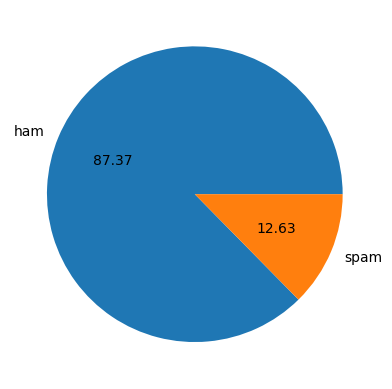

In [136]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [137]:
# Data is imbalanced



In [138]:
import nltk

In [139]:
!pip install nltk


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [140]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Khushi
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [141]:
df['num_characters']=df['text'].apply(len)

In [142]:
df['num_characters'] = df['text'].apply(len)

In [143]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [144]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\Khushi
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [145]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
df['transformed_text'] = df['text'].apply(lambda x: tokenizer.tokenize(x))


In [146]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
df['num_words'] = df['text'].apply(lambda x: len(tokenizer.tokenize(x)))
print(df['num_words'])


0       23
1        8
2       36
3       13
4       15
        ..
5567    33
5568     9
5569    14
5570    27
5571     6
Name: num_words, Length: 5169, dtype: int64


In [147]:
df['num_words'] = df['text'].apply(lambda x: len(str(x).split()))


In [148]:
df.head()

,target,text,num_characters,transformed_text,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy.., Availab...",20
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",28
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",13


In [149]:
df['num_sentences'] = df['text'].apply(lambda x: len(str(x).split('.')))


In [150]:
df.head()

,target,text,num_characters,transformed_text,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy.., Availab...",20,9
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",6,7
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",28,2
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",11,7
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",13,1


In [151]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,2.934030
std,58.236293,11.068488,2.541852
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,4.000000
max,910.000000,171.000000,42.000000


In [152]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,2.916519
std,56.358207,11.116240,2.638732
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,2.000000
75%,90.000000,18.000000,4.000000
max,910.000000,171.000000,42.000000


In [153]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,3.055130
std,30.137753,5.967672,1.725848
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,14.000000


In [154]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='num_characters', ylabel='Count'>

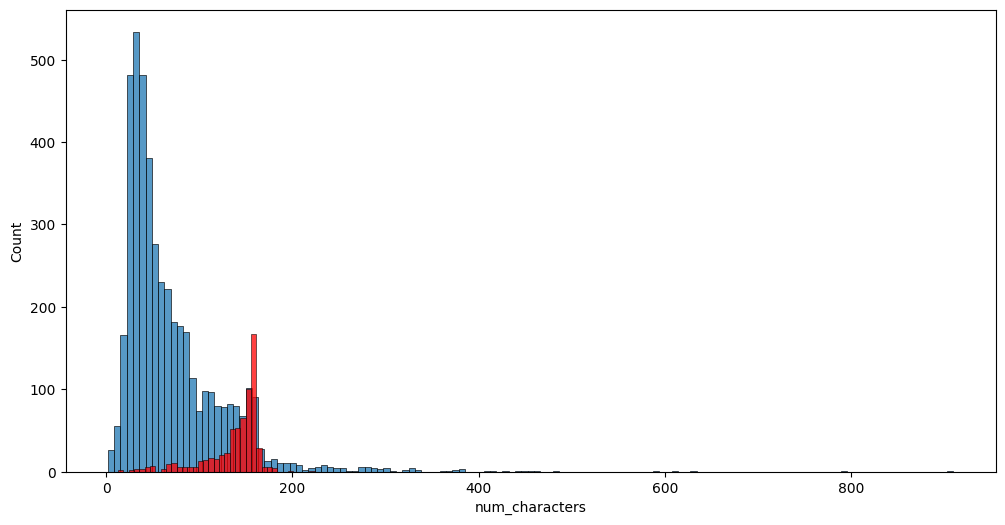

In [155]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

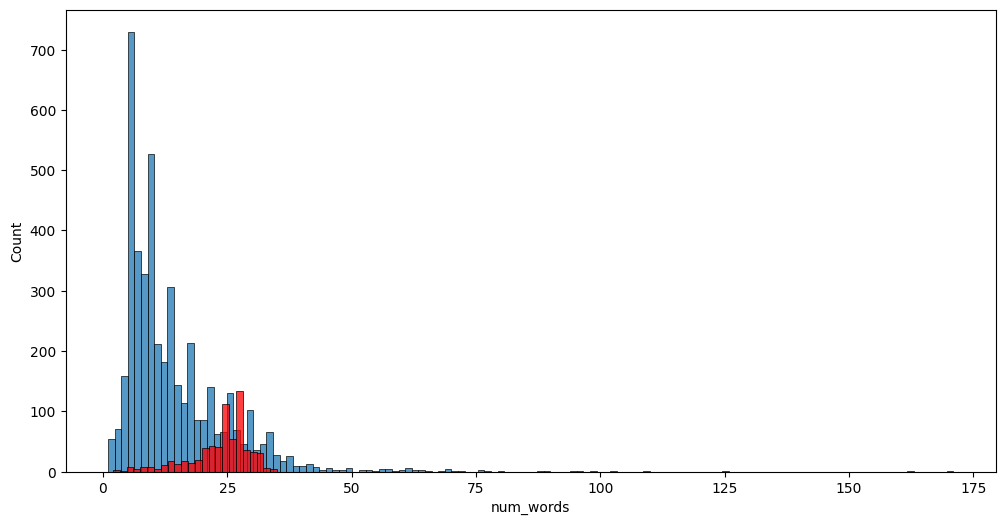

In [156]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

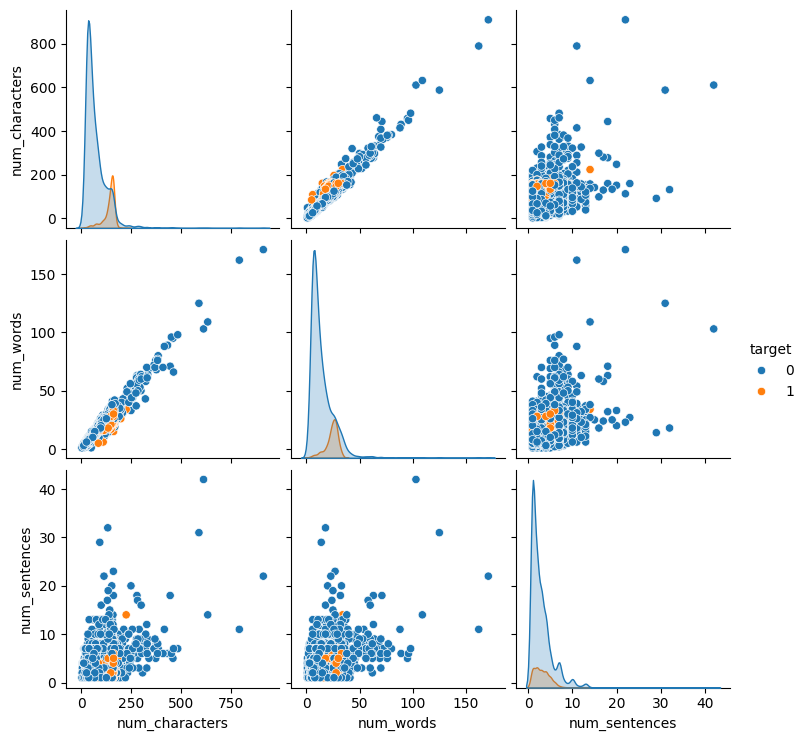

In [157]:
sns.pairplot(df,hue='target')

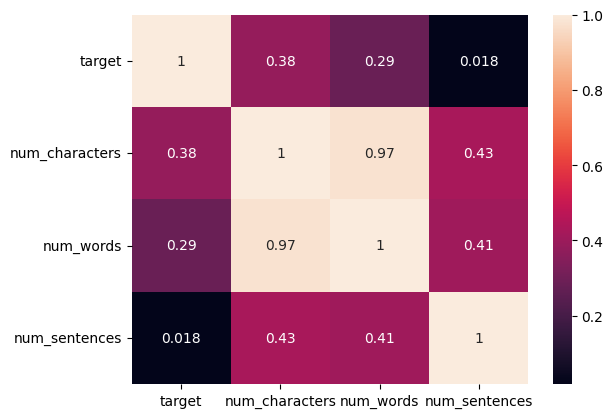

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Heatmap
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [159]:
'''def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)
    '''


'def transform_text(text):\n    text = text.lower()\n    text = nltk.word_tokenize(text)\n\n    y = []\n    for i in text:\n        if i.isalnum():\n            y.append(i)\n\n    text = y[:]\n    y.clear()\n\n    for i in text:\n        if i not in stopwords.words(\'english\') and i not in string.punctuation:\n            y.append(i)\n\n    text = y[:]\n    y.clear()\n\n    for i in text:\n        y.append(ps.stem(i))\n\n\n    return " ".join(y)\n    '

In [160]:
import pandas as pd
import re
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# 1. Download stopwords
nltk.download('stopwords')

# 2. Load your full dataset
df = pd.read_csv("spam.csv", encoding='latin-1')

# 3. Optional: Keep only the needed columns (example: text and label)
df = df[['v1', 'v2']]
df.columns = ['target', 'text']

# 4. Define transform_text function
def transform_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    
    tokenizer = TreebankWordTokenizer()
    tokens = tokenizer.tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(word) for word in filtered_tokens]
    
    return " ".join(stemmed_tokens)

# 5. Apply transformation to all rows
df['transformed_text'] = df['text'].apply(transform_text)

# 6. Now check full dataset
print(df.shape)           # e.g., (5572, 3)
print(df.head())          # Should show first 5 rows


[nltk_data] Downloading package stopwords to C:\Users\Khushi
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(5572, 3)
  target                                               text  \
0    ham  Go until jurong point, crazy.. Available only ...   
1    ham                      Ok lar... Joking wif u oni...   
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3    ham  U dun say so early hor... U c already then say...   
4    ham  Nah I don't think he goes to usf, he lives aro...   

                                    transformed_text  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri 2 wkli comp win fa cup final tkt 21...  
3                u dun say earli hor u c alreadi say  
4          nah dont think goe usf live around though  


In [161]:
df['text'][2090]

'S:-)kallis wont play in first two odi:-)'

In [162]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [163]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u 750 pound prize 2 c...
5568                                b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: text, Length: 5572, dtype: object

In [164]:
df.head()

,target,text,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


In [165]:
df['transformed_text'] = df['text'].apply(transform_text)


In [166]:
import pandas as pd

# Safe sentence count function
def count_sentences(text):
    return text.count('.') + text.count('!') + text.count('?')

# Columns add karo
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(x.split()))
df['num_sentences'] = df['text'].apply(count_sentences)

# Dekho output
print(df.head())


  target                                               text  \
0    ham  Go until jurong point, crazy.. Available only ...   
1    ham                      Ok lar... Joking wif u oni...   
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3    ham  U dun say so early hor... U c already then say...   
4    ham  Nah I don't think he goes to usf, he lives aro...   

                                    transformed_text  num_characters  \
0  go jurong point crazi avail bugi n great world...             111   
1                              ok lar joke wif u oni              29   
2  free entri 2 wkli comp win fa cup final tkt 21...             155   
3                u dun say earli hor u c alreadi say              49   
4          nah dont think goe usf live around though              61   

   num_words  num_sentences  
0         20              8  
1          6              6  
2         28              1  
3         11              6  
4         13              0  


In [167]:
df.head()

,target,text,transformed_text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,111,20,8
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,29,6,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,155,28,1
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,49,11,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,61,13,0


In [168]:
%pip install wordcloud


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [169]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

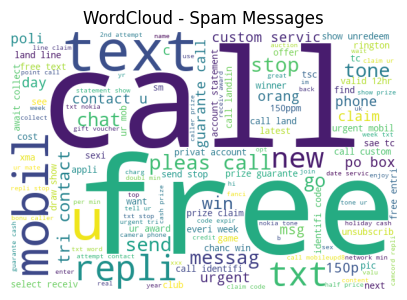

In [170]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter spam messages
spam_text = df[df['target'] == 'spam']['transformed_text'].str.cat(sep=" ")

# Check if spam_text has at least 1 word
if spam_text.strip():
    wc = WordCloud(width=600, height=400, min_font_size=10, background_color='white')
    spam_wc = wc.generate(spam_text)

    plt.figure(figsize=(5,5))
    plt.imshow(spam_wc)
    plt.axis("off")
    plt.title("WordCloud - Spam Messages")
    plt.show()
else:
    print("⚠️ No spam words found for word cloud.")


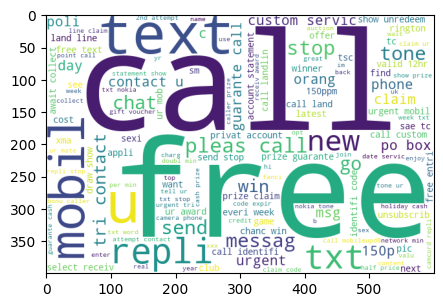

In [171]:
plt.figure(figsize=(5,5))
plt.imshow(spam_wc)

In [172]:
'''ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))'''
'''print(df['transformed_text'].head())
print(type(df['transformed_text'].iloc[0]))
'''
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud setup
wc = WordCloud(width=600, height=400, min_font_size=10, background_color='white')

# STEP 1: Filter only non-empty ham messages
ham_text_series = df[(df['target'] == 0) & (df['transformed_text'].notnull()) & (df['transformed_text'].str.strip() != '')]['transformed_text']

# STEP 2: Join all strings together
ham_text = ham_text_series.str.cat(sep=" ")

# STEP 3: Generate wordcloud if text is not empty
if ham_text.strip():  # If not empty after join
    ham_wc = wc.generate(ham_text)

    # Plot it
    plt.figure(figsize=(10, 6))
    plt.imshow(ham_wc)
    plt.axis("off")
    plt.title("WordCloud - Ham Messages")
    plt.show()
else:
    print("⚠️ No valid words found in ham messages for wordcloud.")


⚠️ No valid words found in ham messages for wordcloud.


In [173]:
print(df['text'].head())
print(df['transformed_text'].head())



0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object
0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri 2 wkli comp win fa cup final tkt 21...
3                  u dun say earli hor u c alreadi say
4            nah dont think goe usf live around though
Name: transformed_text, dtype: object


In [174]:
print(transform_text("This is a normal message"))


normal messag


In [175]:
import re
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords

nltk.download('stopwords')

text = "Hi! How are you doing @ home?"

# 1. Lowercase
text = text.lower()

# 2. Remove special characters
text = re.sub(r'[^a-z0-9\s]', '', text)

# 3. Tokenize
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)

# 4. Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

print("Filtered tokens:", filtered_tokens)


Filtered tokens: ['hi', 'home']


[nltk_data] Downloading package stopwords to C:\Users\Khushi
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [176]:
print(df['target'].unique())
print(df['target'].value_counts())


['ham' 'spam']
target
ham     4825
spam     747
Name: count, dtype: int64


In [177]:
print(df[['text', 'transformed_text', 'target']].head(10))


                                                text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   
5  FreeMsg Hey there darling it's been 3 week's n...   
6  Even my brother is not like to speak with me. ...   
7  As per your request 'Melle Melle (Oru Minnamin...   
8  WINNER!! As a valued network customer you have...   
9  Had your mobile 11 months or more? U R entitle...   

                                    transformed_text target  
0  go jurong point crazi avail bugi n great world...    ham  
1                              ok lar joke wif u oni    ham  
2  free entri 2 wkli comp win fa cup final tkt 21...   spam  
3                u dun say earli hor u c alreadi say    ham  
4          nah dont think goe usf live around though    ham  
5  freemsg 

In [178]:
print(df['target'].unique())


['ham' 'spam']


In [179]:
df.head()

,target,text,transformed_text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,111,20,8
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,29,6,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,155,28,1
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,49,11,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,61,13,0


In [180]:
# Step 1: Check unique values in target
print("Before encoding:", df['target'].unique())

# Step 2: Label Encoding: 'ham' → 0, 'spam' → 1
df['target'] = df['target'].map({'ham': 0, 'spam': 1})

# Step 3: Check if any NaN generated (due to unexpected values)
print("Number of NaN in target after encoding:", df['target'].isnull().sum())

# Step 4 (Optional): Remove rows where target became NaN
df = df.dropna(subset=['target'])

# Step 5: Ensure the target is integer type
df['target'] = df['target'].astype(int)

# Step 6: Final check
print("After encoding:", df['target'].unique())
print(df['target'].value_counts())


Before encoding: ['ham' 'spam']
Number of NaN in target after encoding: 0
After encoding: [0 1]
target
0    4825
1     747
Name: count, dtype: int64


In [181]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [182]:
len(spam_corpus)

12513

In [183]:
print(df['target'].value_counts())


target
0    4825
1     747
Name: count, dtype: int64


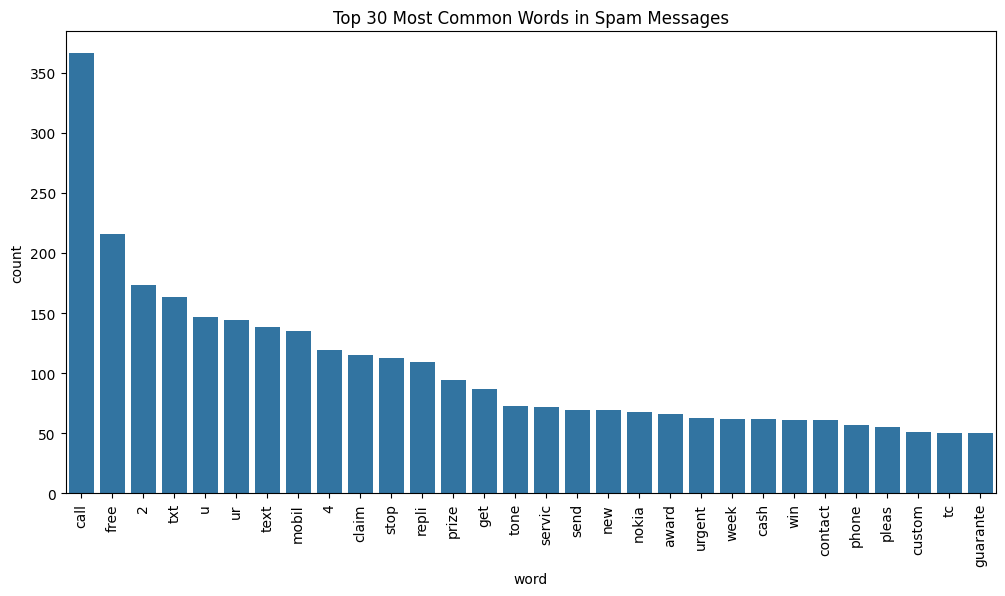

In [184]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure spam_corpus is defined:
# Example: spam_corpus = ' '.join(df[df['target'] == 1]['transformed_text']).split()

# Count top 30 most common spam words
spam_freq = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=spam_freq)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Spam Messages")
plt.show()


In [185]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [186]:
len(ham_corpus)

39709

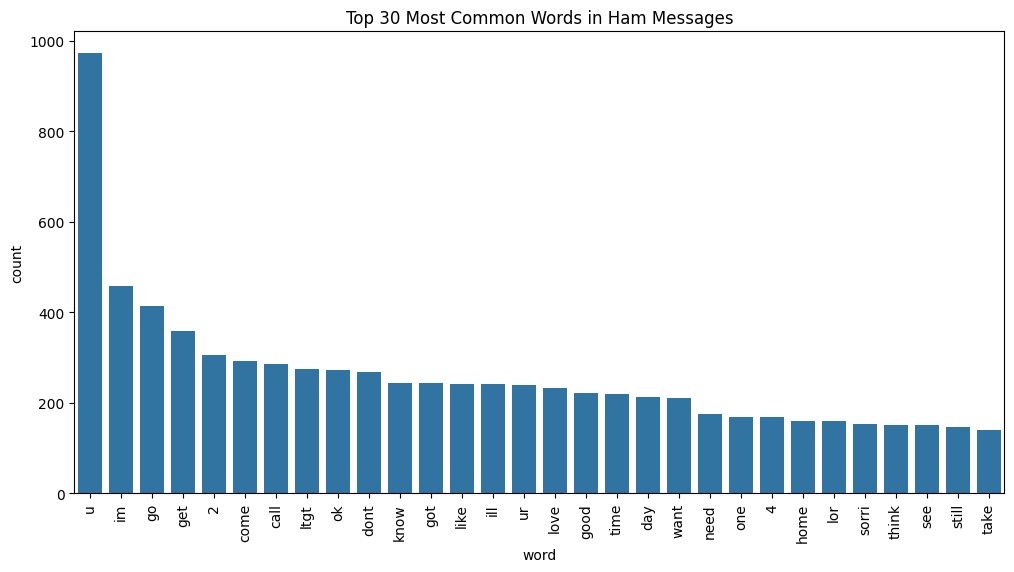

In [187]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count top 30 words in ham_corpus
ham_freq = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=ham_freq)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Ham Messages")
plt.show()


In [188]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,transformed_text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,111,20,8
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,29,6,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,155,28,1
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,49,11,6
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,61,13,0


## 4. Model Building

In [189]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [190]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [191]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [192]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [193]:
X.shape

(5572, 3000)

In [194]:
y = df['target'].values

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [197]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [198]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [199]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8672645739910314
[[840 117]
 [ 31 127]]
0.5204918032786885


In [200]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9668161434977578
[[957   0]
 [ 37 121]]
1.0


In [201]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9730941704035875
[[955   2]
 [ 28 130]]
0.9848484848484849


In [202]:
# tfidf --> MNB

In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [204]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [205]:
clfs = {
    'SVC' : svc,
    'KN' : knc,  
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'xgb':xgb
}

In [206]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [207]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9721973094170404, 0.9703703703703703)

In [208]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9721973094170404
Precision -  0.9703703703703703
For  KN
Accuracy -  0.9076233183856502
Precision -  1.0
For  DT
Accuracy -  0.9246636771300448
Precision -  0.8775510204081632
For  LR
Accuracy -  0.9542600896860987
Precision -  0.9652173913043478
For  RF
Accuracy -  0.9713004484304932
Precision -  1.0
For  xgb
Accuracy -  0.9650224215246637
Precision -  0.9917355371900827


In [209]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [210]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907623,1.000000
4,RF,0.971300,1.000000
5,xgb,0.965022,0.991736
0,SVC,0.972197,0.970370
3,LR,0.954260,0.965217
2,DT,0.924664,0.877551


In [211]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [212]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.907623
1,RF,Accuracy,0.971300
2,xgb,Accuracy,0.965022
3,SVC,Accuracy,0.972197
4,LR,Accuracy,0.954260
5,DT,Accuracy,0.924664
6,KN,Precision,1.000000
7,RF,Precision,1.000000
8,xgb,Precision,0.991736
9,SVC,Precision,0.970370


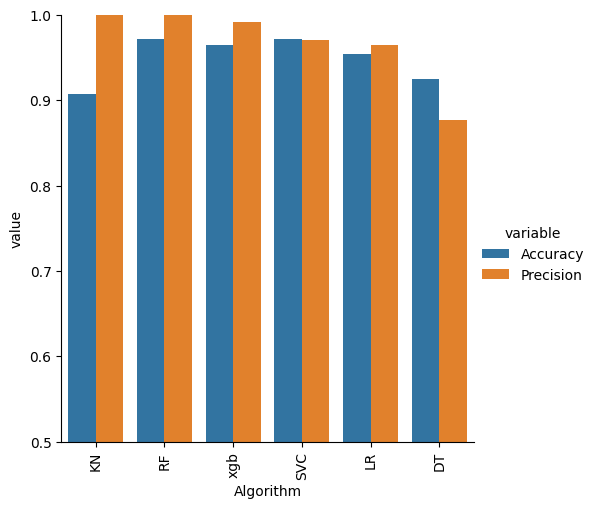

In [213]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [214]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [215]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [216]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [217]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [218]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [219]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [220]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.907623,1.000000,0.907623,1.000000,0.907623,1.000000,0.907623,1.000000
1,RF,0.971300,1.000000,0.971300,1.000000,0.971300,1.000000,0.971300,1.000000
2,xgb,0.965022,0.991736,0.965022,0.991736,0.965022,0.991736,0.965022,0.991736
3,SVC,0.972197,0.970370,0.972197,0.970370,0.972197,0.970370,0.972197,0.970370
4,LR,0.954260,0.965217,0.954260,0.965217,0.954260,0.965217,0.954260,0.965217
5,DT,0.924664,0.877551,0.924664,0.877551,0.924664,0.877551,0.924664,0.877551


In [221]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [222]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [223]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [224]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9775784753363229
Precision 0.9925925925925926


In [225]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [226]:
from sklearn.ensemble import StackingClassifier

In [227]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [228]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9820627802690582
Precision 0.9791666666666666


In [229]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [230]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score

# 1. Load dataset
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['target', 'text']
df['target'] = df['target'].map({'ham': 0, 'spam': 1})

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

# 3. TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 4. Base estimators
mnb = MultinomialNB()
svc = SVC(probability=True)

estimators = [
    ('nb', mnb),
    ('svc', svc)
]

# 5. Final stacking model
final_estimator = RandomForestClassifier()
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

# 6. Train
clf.fit(X_train_tfidf, y_train)

# 7. Evaluate
y_pred = clf.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

# 8. Save model & vectorizer
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(clf, open('model.pkl', 'wb'))

print("✅ Model & Vectorizer saved successfully")


Accuracy: 0.979372197309417
Precision: 0.9440559440559441
✅ Model & Vectorizer saved successfully


In [231]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to C:\Users\Khushi
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Khushi
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [232]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Load dataset
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['target', 'text']
df['target'] = df['target'].map({'ham': 0, 'spam': 1})

# Split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2)

# TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)

# Train model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Save model and vectorizer
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))
